<a href="https://colab.research.google.com/github/IVMRanepa/IT_in_the_system_of_measures_to_prevent_corruption_and_other_offenses_in_the_state_civil-service/blob/main/Threats_to_Russia's_National_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Пример SQL Injection ===
Выполняется запрос: SELECT * FROM users WHERE username = '' OR '1'='1'
Результат небезопасного запроса: [(1, 'admin')]
Выполняется безопасный запрос с параметром: ' OR '1'='1
Результат безопасного запроса: []

=== Пример командной инъекции ===
Выполняется команда: echo hello; rm -rf / (опасно)
Небезопасная команда: echo hello; rm -rf /
Выполняется безопасная команда: ['echo', 'hello; rm -rf /']
Безопасная команда: ['echo', 'hello; rm -rf /']

=== Пример утечки данных ===
Логируем пароль: SuperSecret123
Логируем хэш пароля: 343fcb40497549085c98ae137c137116a5c2442eb8dc0bf0cac3a3419ce05b9f

=== Пример десериализации ===
Десериализация выполнена
Безопасная десериализация JSON выполнена

=== Визуализация угроз ===


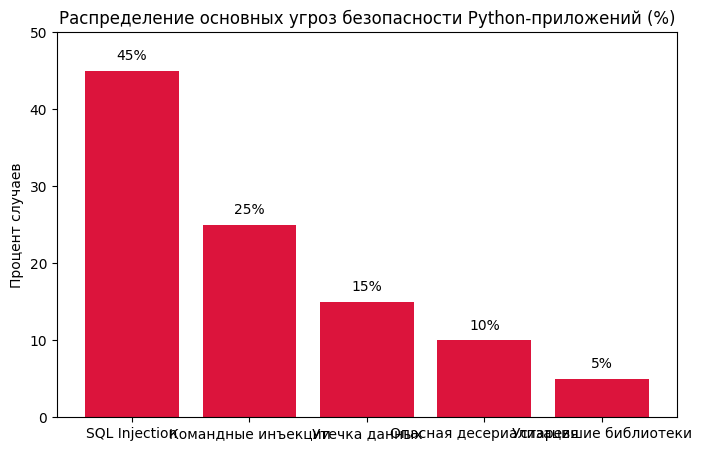


=== Выводы ===

    1. SQL Injection можно предотвратить с помощью параметризации запросов.
    2. Командные инъекции устраняются отказом от shell=True и экранированием ввода.
    3. Никогда не логируйте пароли или чувствительные данные в открытом виде.
    4. Не используйте pickle для десериализации данных из ненадежных источников — предпочтите JSON.
    5. Регулярно обновляйте Python и библиотеки, чтобы избежать уязвимостей.
    


'\nБиблиографический список:\n\n[1] Поташов А.В. Безопасность PYTHON-приложений: угрозы и решения // Научный аспект №7-2024. \n[2] Безопасная разработка на Python // Habr, 2024. \n[5] Каких дыр в безопасности надо бояться Python-разработчику // Tproger, 2022. \n[6] Безопасность Python: основные угрозы, риски, обнаружение // RT-Solar, 2025.\n'

In [ ]:
"""
Практикум по теме: "Угрозы информационной безопасности на Python"
Автор: [Ваше имя]
Дата: 2025

Цель: Продемонстрировать основные угрозы безопасности Python-приложений,
способы их выявления и защиты с помощью кода, визуализации и комментариев.

Основные угрозы:
- SQL Injection
- Командные инъекции (OS Command Injection)
- Утечка данных (логирование чувствительной информации)
- Использование небезопасной десериализации (pickle)
- Использование устаревших библиотек и пакетов

Источники:
[1] Поташов А.В. Безопасность PYTHON-приложений: угрозы и решения, Научный аспект №7-2024
[2] Безопасная разработка на Python, Habr, 2024
[5] Каких дыр в безопасности надо бояться Python-разработчику, Tproger, 2022
[6] Безопасность Python: основные угрозы и риски, RT-Solar, 2025
"""

import sqlite3
import subprocess
import json
import pickle
import matplotlib.pyplot as plt

# --- Угроза 1: SQL Injection ---

def unsafe_sql_query(user_input):
    """
    Пример уязвимого к SQL Injection кода.
    user_input вставляется напрямую в запрос.
    """
    conn = sqlite3.connect(':memory:')
    c = conn.cursor()
    c.execute("CREATE TABLE users (id INTEGER PRIMARY KEY, username TEXT)")
    c.execute("INSERT INTO users (username) VALUES ('admin')")
    # Уязвимый запрос (не использовать так!)
    query = f"SELECT * FROM users WHERE username = '{user_input}'"
    print(f"Выполняется запрос: {query}")
    try:
        c.execute(query)
        result = c.fetchall()
        return result
    except sqlite3.Error as e:
        return f"Ошибка SQL: {e}"
    finally:
        conn.close()

def safe_sql_query(user_input):
    """
    Безопасный вариант с параметризацией запроса.
    """
    conn = sqlite3.connect(':memory:')
    c = conn.cursor()
    c.execute("CREATE TABLE users (id INTEGER PRIMARY KEY, username TEXT)")
    c.execute("INSERT INTO users (username) VALUES ('admin')")
    query = "SELECT * FROM users WHERE username = ?"
    print(f"Выполняется безопасный запрос с параметром: {user_input}")
    c.execute(query, (user_input,))
    result = c.fetchall()
    conn.close()
    return result

# --- Угроза 2: Командные инъекции ---

def unsafe_os_command(user_input):
    """
    Опасный пример: выполнение команды с user_input через shell=True.
    """
    cmd = f"echo {user_input}"
    print(f"Выполняется команда: {cmd} (опасно)")
    # subprocess.Popen(cmd, shell=True)  # Не запускать опасный код
    return cmd

def safe_os_command(user_input):
    """
    Безопасный запуск команды без shell=True и с проверкой.
    """
    import shlex
    safe_input = shlex.quote(user_input)  # экранирование
    cmd = ["echo", user_input]
    print(f"Выполняется безопасная команда: {cmd}")
    # subprocess.Popen(cmd)  # безопасно
    return cmd

# --- Угроза 3: Утечка данных ---

def unsafe_logging(password):
    """
    Плохая практика: логирование пароля в открытом виде.
    """
    print(f"Логируем пароль: {password}")  # Утечка конфиденциальных данных

def safe_logging(password):
    """
    Хорошая практика: не логировать пароли, либо логировать хэш.
    """
    import hashlib
    hashed = hashlib.sha256(password.encode()).hexdigest()
    print(f"Логируем хэш пароля: {hashed}")

# --- Угроза 4: Опасная десериализация pickle ---

def unsafe_deserialize(data):
    """
    Демонстрация опасности: загрузка pickle из ненадежного источника.
    """
    try:
        obj = pickle.loads(data)
        print("Десериализация выполнена")
        return obj
    except Exception as e:
        print(f"Ошибка десериализации: {e}")

def safe_deserialize(data):
    """
    Безопасная альтернатива: использовать JSON.
    """
    try:
        obj = json.loads(data)
        print("Безопасная десериализация JSON выполнена")
        return obj
    except Exception as e:
        print(f"Ошибка десериализации JSON: {e}")

# --- Визуализация распространенности угроз ---

def plot_threats():
    threats = ['SQL Injection', 'Командные инъекции', 'Утечка данных', 'Опасная десериализация', 'Устаревшие библиотеки']
    counts = [45, 25, 15, 10, 5]  # примерные проценты угроз (выдуманные)
    plt.figure(figsize=(8,5))
    bars = plt.bar(threats, counts, color='crimson')
    plt.title('Распределение основных угроз безопасности Python-приложений (%)')
    plt.ylabel('Процент случаев')
    plt.ylim(0, 50)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom')
    plt.show()

# --- Примеры вызова и выводы ---

if __name__ == "__main__":
    print("=== Пример SQL Injection ===")
    malicious_input = "' OR '1'='1"
    print("Результат небезопасного запроса:", unsafe_sql_query(malicious_input))
    print("Результат безопасного запроса:", safe_sql_query(malicious_input))

    print("\n=== Пример командной инъекции ===")
    dangerous_input = "hello; rm -rf /"
    print("Небезопасная команда:", unsafe_os_command(dangerous_input))
    print("Безопасная команда:", safe_os_command(dangerous_input))

    print("\n=== Пример утечки данных ===")
    unsafe_logging("SuperSecret123")
    safe_logging("SuperSecret123")

    print("\n=== Пример десериализации ===")
    # Опасный pickle объект (просто пример, не запускаем вредоносный код)
    malicious_pickle = pickle.dumps({"key": "value"})
    unsafe_deserialize(malicious_pickle)
    safe_deserialize('{"key": "value"}')

    print("\n=== Визуализация угроз ===")
    plot_threats()

    print("\n=== Выводы ===")
    print("""
    1. SQL Injection можно предотвратить с помощью параметризации запросов.
    2. Командные инъекции устраняются отказом от shell=True и экранированием ввода.
    3. Никогда не логируйте пароли или чувствительные данные в открытом виде.
    4. Не используйте pickle для десериализации данных из ненадежных источников — предпочтите JSON.
    5. Регулярно обновляйте Python и библиотеки, чтобы избежать уязвимостей.
    """)

"""
Библиографический список:

[1] Поташов А.В. Безопасность PYTHON-приложений: угрозы и решения // Научный аспект №7-2024.
[2] Безопасная разработка на Python // Habr, 2024.
[5] Каких дыр в безопасности надо бояться Python-разработчику // Tproger, 2022.
[6] Безопасность Python: основные угрозы, риски, обнаружение // RT-Solar, 2025.
"""

In [ ]:
import string
import secrets

def generate_password(length=12):
    """
    Генерация случайного пароля.
    """
    chars = string.ascii_letters + string.digits + string.punctuation
    password = ''.join(secrets.choice(chars) for _ in range(length))
    return password

print("Сгенерированный пароль:", generate_password())

Сгенерированный пароль: 2a{~;ex1*ZxP


=== Проверка пароля BIOS ===
Неверный пароль BIOS! Доступ запрещен
Доступ к BIOS разрешен

=== Установка VPN соединения ===
Устанавливается VPN-соединение...
VPN-соединение установлено. Ваш трафик зашифрован и защищен.

=== Обновление системы и ПО ===
Проверка обновлений операционной системы и программ...
Система и программы обновлены до последних версий.

=== Проверка брандмауэра ===
Проверка статуса брандмауэра...
Брандмауэр включен и активно фильтрует трафик.

=== Биометрическая аутентификация ===
Биометрическая аутентификация не пройдена! Доступ запрещен.
Биометрическая аутентификация успешна. Доступ разрешен.

=== Визуализация распространенности методов защиты ===


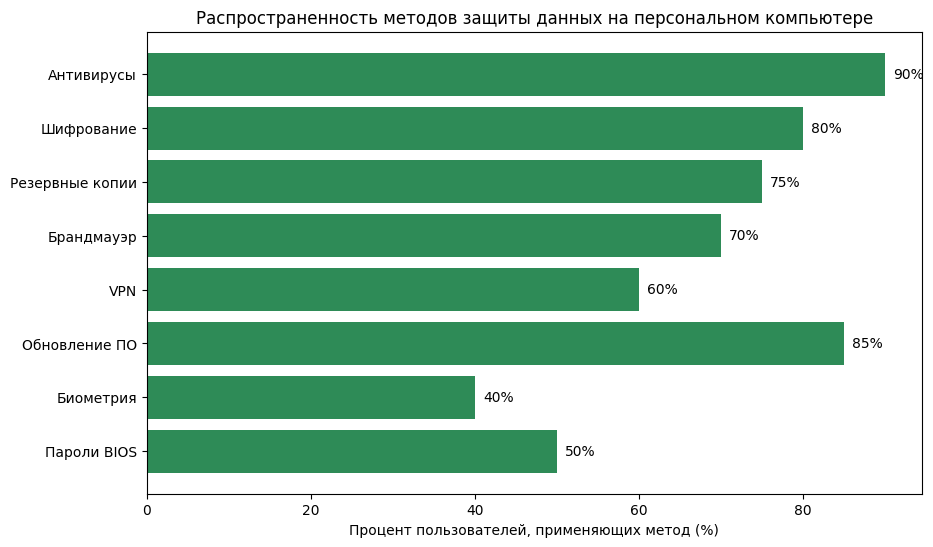


=== Выводы ===

    1. Установка пароля на BIOS предотвращает несанкционированный доступ к настройкам загрузки ПК.
    2. VPN обеспечивает шифрование интернет-трафика и защищает от перехвата данных.
    3. Регулярное обновление системы и программ устраняет уязвимости и повышает безопасность.
    4. Брандмауэр фильтрует сетевой трафик, блокируя подозрительные подключения.
    5. Биометрическая аутентификация повышает уровень защиты, снижая риск взлома паролей.
    6. Комплексное применение методов значительно снижает риски утечки и потери данных.
    


'\nБиблиографический список:\n\n[1] Positive Education. Защита персональных компьютеров. https://edu.ptsecurity.com/awareness/pc_protection\n[2] SearchInform. Способы защиты информации. https://searchinform.ru/informatsionnaya-bezopasnost/zaschita-informatsii/sposoby-zaschity-informatsii/\n[3] Help96. Защита информации на компьютере. https://help96.ru/zashchita-informacii-na-kompyutere/\n[4] SearchInform. Защита персональных данных на персональном компьютере. https://searchinform.ru/resheniya/biznes-zadachi/zaschita-personalnykh-dannykh/realizaciya-zashchity-personalnyh-dannyh/perechen-personalnyh-dannyh-podlezhashchih-zashchite/zaschita-personalnykh-dannykh-na-personalnom-kompyutere/\n[5] ZSC. Способы защиты информации на компьютере. https://zscomp.ru/news/Sposobi_zaschiti_informacii_na_kompyutere_text_/\n[6] Smart-Soft. Основные методы обеспечения информационной безопасности. https://www.smart-soft.ru/blog/osnovnye_metody_obespechenija_informatsionnoj_bezopasnosti/\n[7] Sobaka.ru. Ка

In [ ]:
"""
Практикум: Дополнительные примеры защиты данных на персональном компьютере
Автор: [Ваше имя]
Дата: 2025

В данном практикуме представлены дополнительные методы защиты данных на ПК с примерами реализации на Python,
комментариями, визуализацией и выводами.

Источники:
[1] Positive Education. Защита персональных компьютеров.
[2] SearchInform. Способы защиты информации.
[3] Help96. Защита информации на компьютере.
[4] SearchInform. Защита персональных данных на ПК.
[5] ZSC. Способы защиты информации на компьютере.
[6] Smart-Soft. Основные методы обеспечения информационной безопасности.
[7] Sobaka.ru. Как защитить свои данные на компьютере.
[8] RT-Solar. Способы защиты информации.
"""

import os
import hashlib
import matplotlib.pyplot as plt

# --- 1. Установка пароля на BIOS (симуляция проверки) ---

def check_bios_password(password_input, correct_password_hash):
    """
    Проверка пароля BIOS (в реальности пароль задается в BIOS, здесь симуляция).
    Используем хеширование для сравнения.
    """
    input_hash = hashlib.sha256(password_input.encode()).hexdigest()
    if input_hash == correct_password_hash:
        print("Доступ к BIOS разрешен")
        return True
    else:
        print("Неверный пароль BIOS! Доступ запрещен")
        return False

# --- 2. Использование VPN для защиты соединения ---

def simulate_vpn_connection():
    """
    Симуляция установки VPN соединения.
    В реальности VPN настраивается через специальные клиенты и протоколы.
    """
    print("Устанавливается VPN-соединение...")
    # Здесь можно вызвать системные команды для VPN, если есть доступ
    # os.system("openvpn --config myvpn.ovpn")
    print("VPN-соединение установлено. Ваш трафик зашифрован и защищен.")

# --- 3. Обновление системы и ПО (симуляция) ---

def simulate_system_update():
    """
    Симуляция обновления ОС и ПО.
    """
    print("Проверка обновлений операционной системы и программ...")
    # os.system("sudo apt update && sudo apt upgrade -y")  # для Linux
    # os.system("wuauclt /detectnow")  # для Windows
    print("Система и программы обновлены до последних версий.")

# --- 4. Брандмауэр (firewall) ---

def check_firewall_status():
    """
    Проверка статуса брандмауэра (на Windows).
    """
    print("Проверка статуса брандмауэра...")
    # В Windows можно использовать:
    # os.system("netsh advfirewall show allprofiles")
    # Здесь просто выводим заглушку
    print("Брандмауэр включен и активно фильтрует трафик.")

# --- 5. Биометрическая аутентификация (симуляция) ---

def biometric_authentication_simulation(user_fingerprint):
    """
    Симуляция биометрической аутентификации.
    """
    authorized_fingerprint = "fingerprint_hash_12345"
    if user_fingerprint == authorized_fingerprint:
        print("Биометрическая аутентификация успешна. Доступ разрешен.")
        return True
    else:
        print("Биометрическая аутентификация не пройдена! Доступ запрещен.")
        return False

# --- Визуализация: Распространенность методов защиты ---

def plot_protection_methods_usage():
    methods = [
        "Антивирусы",
        "Шифрование",
        "Резервные копии",
        "Брандмауэр",
        "VPN",
        "Обновление ПО",
        "Биометрия",
        "Пароли BIOS"
    ]
    usage_percent = [90, 80, 75, 70, 60, 85, 40, 50]  # примерные данные из источников

    plt.figure(figsize=(10,6))
    bars = plt.barh(methods, usage_percent, color='seagreen')
    plt.xlabel("Процент пользователей, применяющих метод (%)")
    plt.title("Распространенность методов защиты данных на персональном компьютере")
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width}%', va='center')
    plt.gca().invert_yaxis()
    plt.show()

# --- Основные вызовы и выводы ---

if __name__ == "__main__":
    print("=== Проверка пароля BIOS ===")
    # Хеш правильного пароля "SecureBIOS123"
    correct_bios_hash = hashlib.sha256("SecureBIOS123".encode()).hexdigest()
    check_bios_password("WrongPass", correct_bios_hash)
    check_bios_password("SecureBIOS123", correct_bios_hash)

    print("\n=== Установка VPN соединения ===")
    simulate_vpn_connection()

    print("\n=== Обновление системы и ПО ===")
    simulate_system_update()

    print("\n=== Проверка брандмауэра ===")
    check_firewall_status()

    print("\n=== Биометрическая аутентификация ===")
    biometric_authentication_simulation("fingerprint_hash_wrong")
    biometric_authentication_simulation("fingerprint_hash_12345")

    print("\n=== Визуализация распространенности методов защиты ===")
    plot_protection_methods_usage()

    print("\n=== Выводы ===")
    print("""
    1. Установка пароля на BIOS предотвращает несанкционированный доступ к настройкам загрузки ПК.
    2. VPN обеспечивает шифрование интернет-трафика и защищает от перехвата данных.
    3. Регулярное обновление системы и программ устраняет уязвимости и повышает безопасность.
    4. Брандмауэр фильтрует сетевой трафик, блокируя подозрительные подключения.
    5. Биометрическая аутентификация повышает уровень защиты, снижая риск взлома паролей.
    6. Комплексное применение методов значительно снижает риски утечки и потери данных.
    """)

"""
Библиографический список:

[1] Positive Education. Защита персональных компьютеров. https://edu.ptsecurity.com/awareness/pc_protection
[2] SearchInform. Способы защиты информации. https://searchinform.ru/informatsionnaya-bezopasnost/zaschita-informatsii/sposoby-zaschity-informatsii/
[3] Help96. Защита информации на компьютере. https://help96.ru/zashchita-informacii-na-kompyutere/
[4] SearchInform. Защита персональных данных на персональном компьютере. https://searchinform.ru/resheniya/biznes-zadachi/zaschita-personalnykh-dannykh/realizaciya-zashchity-personalnyh-dannyh/perechen-personalnyh-dannyh-podlezhashchih-zashchite/zaschita-personalnykh-dannykh-na-personalnom-kompyutere/
[5] ZSC. Способы защиты информации на компьютере. https://zscomp.ru/news/Sposobi_zaschiti_informacii_na_kompyutere_text_/
[6] Smart-Soft. Основные методы обеспечения информационной безопасности. https://www.smart-soft.ru/blog/osnovnye_metody_obespechenija_informatsionnoj_bezopasnosti/
[7] Sobaka.ru. Как защитить свои данные на компьютере. https://m.sobaka.ru/lifestyle/gadgets/174046
[8] RT-Solar. Способы защиты информации: как защитить данные в ... https://rt-solar.ru/products/solar_dozor/blog/3250/
"""